In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


**Problem Statement: The World Happiness Report is a measure of happiness of countries and the factors that contribute to happiness. The problem is to understand the factors that contribute to happiness and find a relationship between the factors and the happiness score of a country.**

In [9]:
df = pd.read_csv("/kaggle/input/world-happiness/2019.csv")

In [10]:
df.shape

(156, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


**Possible Reason** : Lack of social support: People may not have access to social support or feel isolated, leading to lower happiness scores.

**Solution** : Encouraging social support networks: Governments can encourage the development of community groups and social support networks to improve happiness.

Countries with high levels of social support:
0                      Finland
1                      Denmark
2                       Norway
3                      Iceland
4                  Netherlands
                ...           
107                  Venezuela
109    Palestinian Territories
112                    Namibia
129                  Sri Lanka
132                    Ukraine
Name: Country or region, Length: 94, dtype: object


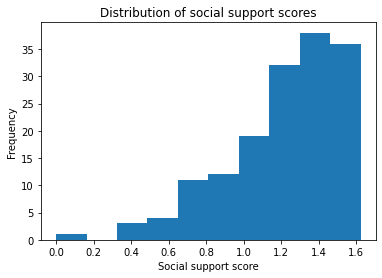

In [12]:
social_support = df[df["Social support"] >= df["Social support"].mean()]

print("Countries with high levels of social support:")
print(social_support["Country or region"])

plt.hist(df["Social support"], bins=10)
plt.xlabel("Social support score")
plt.ylabel("Frequency")
plt.title("Distribution of social support scores")
plt.show()

**Possible Reason** : Lack of freedom: People may feel restricted in their daily lives, leading to lower happiness scores.

**Solution** : Promoting freedom: Governments can promote freedom of choice and reduce restrictions on daily life to improve happiness.

In [13]:
##The higher the correlation, the more freedom promotes happiness

df["freedom_score"] = 0

for i in range(len(df)):

    freedom_choice = df.loc[i, "Freedom to make life choices"]

    restrictions = df.loc[i, "Generosity"]

    df.loc[i, "freedom_score"] = freedom_choice + restrictions

print(df.head())

correlation = df["Score"].corr(df["freedom_score"])
print("Correlation between happiness and freedom_score:", correlation)

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  freedom_score  
0                      0.393          0.749  
1                 

**Possible Reason** : Corruption: High levels of corruption in a country can lower the happiness score.

**Solution** : Combating corruption: Governments can work to reduce corruption and increase transparency to improve happiness.

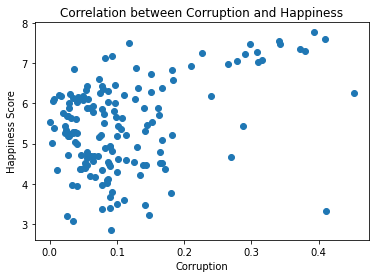

Correlation coefficient between Corruption and Happiness: 0.38561307086647856


In [14]:
##The lower the corruption level, the higher the happiness score tends to be

plt.scatter(df["Perceptions of corruption"], df["Score"])
plt.xlabel("Corruption")
plt.ylabel("Happiness Score")
plt.title("Correlation between Corruption and Happiness")
plt.show()

correlation = df["Perceptions of corruption"].corr(df["Score"])
print("Correlation coefficient between Corruption and Happiness:", correlation)

**Possible Reason** : Unemployment: High levels of unemployment can lead to financial stress and lower happiness scores

**Solution** : Creating job opportunities: Governments can focus on creating job opportunities and reducing unemployment to improve happiness.

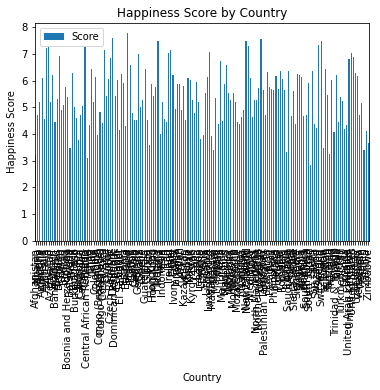

In [15]:
##where to focus their efforts to create job opportunities and reduce unemployment

grouped_data = df.groupby('Country or region').mean()

grouped_data.plot(y='Score', kind='bar')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by Country')

plt.show()

**Possible Reason** : Economic inequality: High levels of economic inequality can lead to a lower sense of well-being for the population.

**Solution** : Addressing economic inequality: Governments can work to address economic inequality and improve the distribution of wealth to improve happiness.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


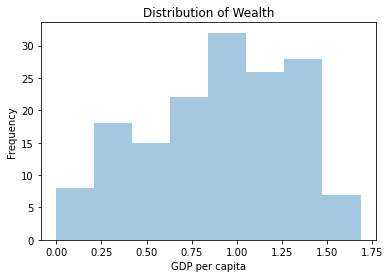

In [16]:
##can see the current distribution of wealth and determine what steps can be taken to address economic inequality and improve the distribution of wealth to improve happiness

sns.distplot(df['GDP per capita'], kde=False)
plt.title("Distribution of Wealth")
plt.xlabel("GDP per capita")
plt.ylabel("Frequency")
plt.show()

Mean GDP per capita: 0.905147435897436
Median GDP per capita: 0.96


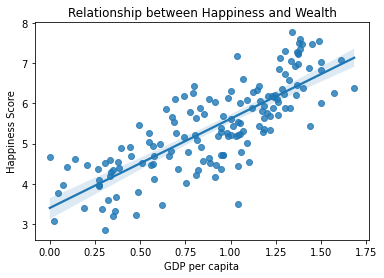

In [17]:
mean = df['GDP per capita'].mean()
median = df['GDP per capita'].median()

print("Mean GDP per capita:", mean)
print("Median GDP per capita:", median)

sns.regplot(x='GDP per capita', y='Score', data=df)
plt.title("Relationship between Happiness and Wealth")
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")

plt.show()